In [8]:
%matplotlib inline

import numpy as np

from collections       import defaultdict, Counter
from glob              import glob
from matplotlib        import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter
from os.path           import join

In [4]:
def data_generate(data_en,data_fr,len_en,len_fr):
    data = []
    with open(data_en, 'r') as text_en, open(data_fr, 'r') as text_fr:
        for (line_en, line_fr) in zip(text_en, text_fr):
            data.append([len_en(line_en), len_fr(line_fr)])
    return np.array(data)

In [5]:
def plot_len_and_cor(name_en,name_fr,data,unit_name):
    x, y = zip(*data)

    # define our basic units of length
    left     , width  = 0.1, 0.65
    bottom   , height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    # start with a rectangular figure
    plt.figure(1, figsize=(8, 8))

    main = plt.axes([left  , bottom  , width, height])
    hist_en = plt.axes([left  , bottom_h, width, 0.2   ])
    hist_fr = plt.axes([left_h, bottom  , 0.2  , height])

    # no labels
    nullfmt = NullFormatter()
    hist_en.xaxis.set_major_formatter(nullfmt)
    hist_en.yaxis.set_major_formatter(nullfmt)
    hist_fr.xaxis.set_major_formatter(nullfmt)
    hist_fr.yaxis.set_major_formatter(nullfmt)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax    = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim      = (int(xymax/binwidth) + 1) * binwidth
    bins     = np.arange(0, lim + binwidth, binwidth)

    # plot the scatter plot
    main.scatter(x,y)
    main.set_xlim((0, lim))
    main.set_ylim((0, lim))
    main.set_xlabel('%s sentence length (%s)' % (name_en,unit_name))
    main.set_ylabel('%s sentence length (%s)' % (name_fr,unit_name))

    # plot the histograms
    hist_en.hist(sorted(x), normed=True, bins=bins)
    hist_fr.hist(sorted(y), normed=True, bins=bins, orientation='horizontal')
    hist_en.set_xlim(main.get_xlim())
    hist_fr.set_ylim(main.get_ylim())
    hist_en.set_ylabel('Counts')
    hist_fr.set_xlabel('Counts')

    # plot the correlation
    k = sum(x*y for x,y in data) / sum(x ** 2 for x,_ in data)
    print("Factor between %s and %s sentence length is %0.2f" % (name_en,name_fr,k))
    main.plot([0,lim], [0,k*lim], color='red')

    plt.show()

In [6]:
def plot_sent_corr(data_dir,text_en='text.en',text_fr='text.fr',
                   name_en='English',name_fr='Inuktitut',unit_name='tokens'):
    data_en = join(data_dir,text_en)
    data_fr = join(data_dir,text_fr)
    len_tok = lambda sent: len(sent.strip().split())
    data = data_generate(data_en=data_en,data_fr=data_fr,len_en=len_tok,len_fr=len_tok)
    plot_len_and_cor(name_en=name_en,name_fr=name_fr,data=data,unit_name=unit_name)

Sentence length correlation for in_en_data_50000
Factor between English and Inuktitut sentence length is 0.42


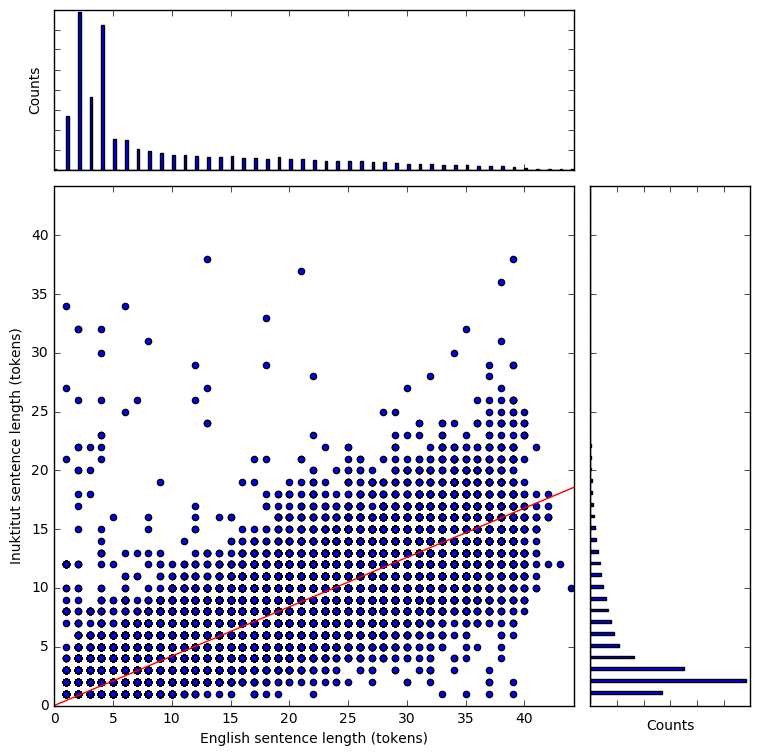

Sentence length correlation for in_en_data_gw100_50000
Factor between English and Inuktitut sentence length is 0.75


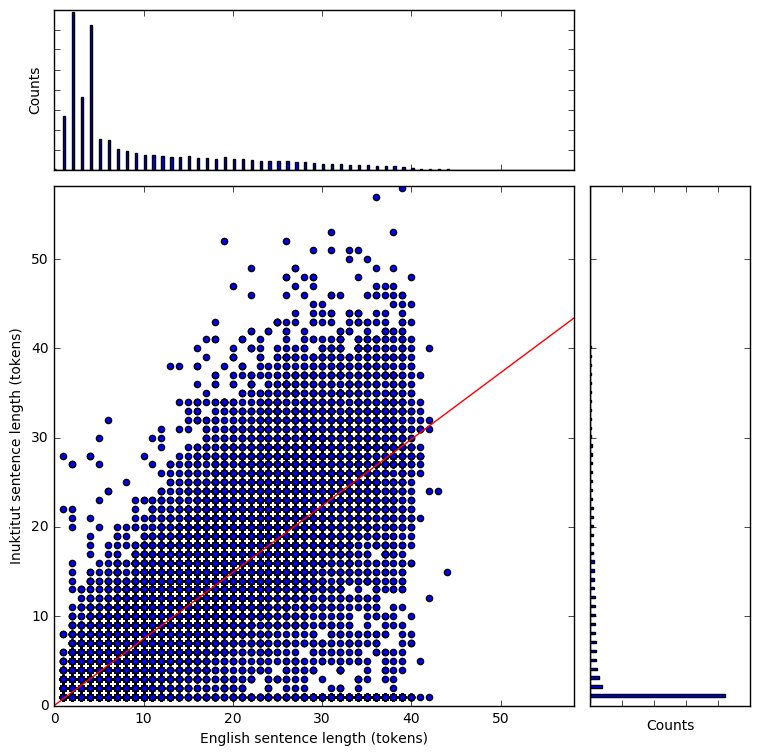

Sentence length correlation for in_en_data_gw300_50000
Factor between English and Inuktitut sentence length is 0.75


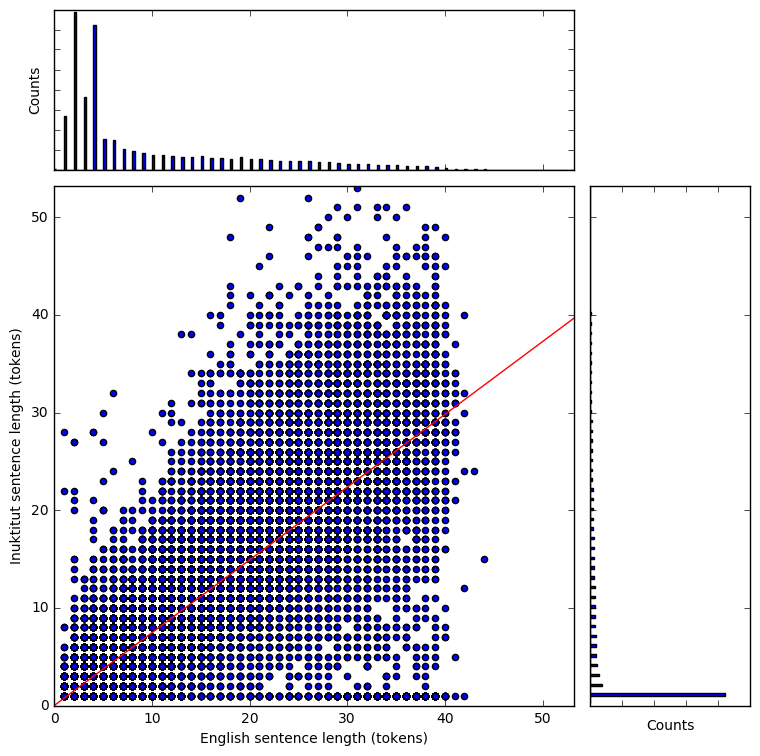

Sentence length correlation for in_en_data_halfjack_50000
Factor between English and Inuktitut sentence length is 5.50


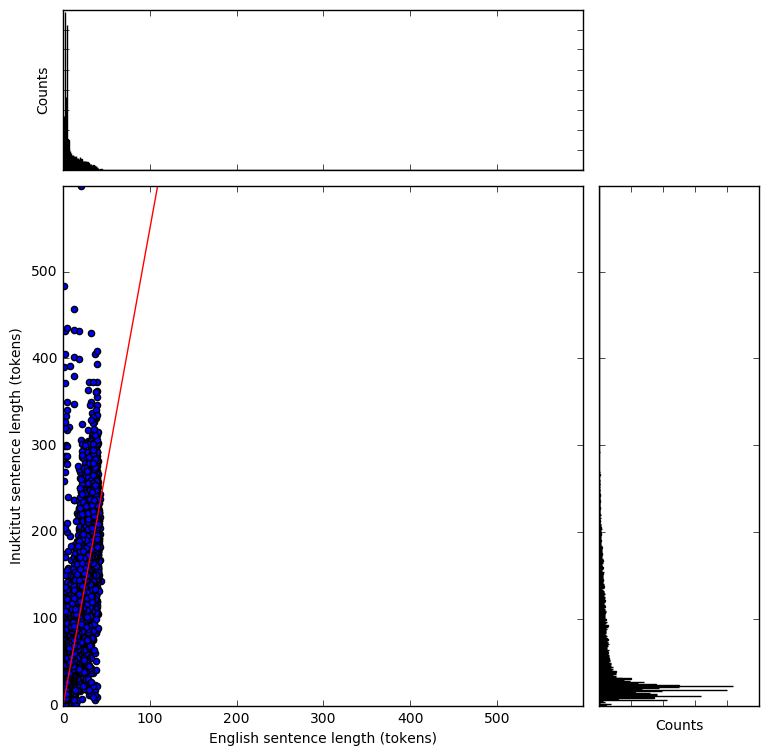

Sentence length correlation for in_en_data_mcb10000_50000
Factor between English and Inuktitut sentence length is 0.90


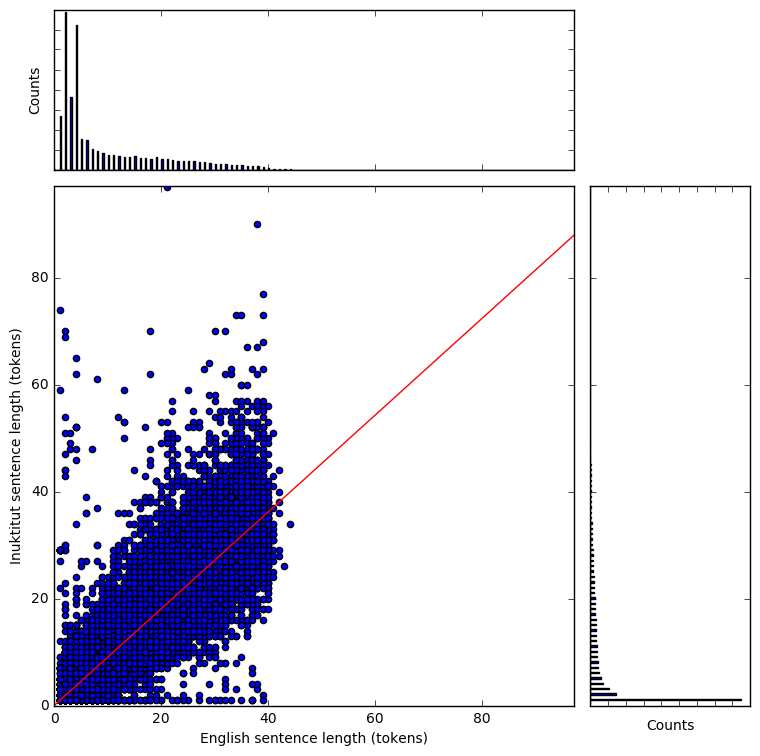

Sentence length correlation for in_en_data_mcb1000_50000
Factor between English and Inuktitut sentence length is 1.56


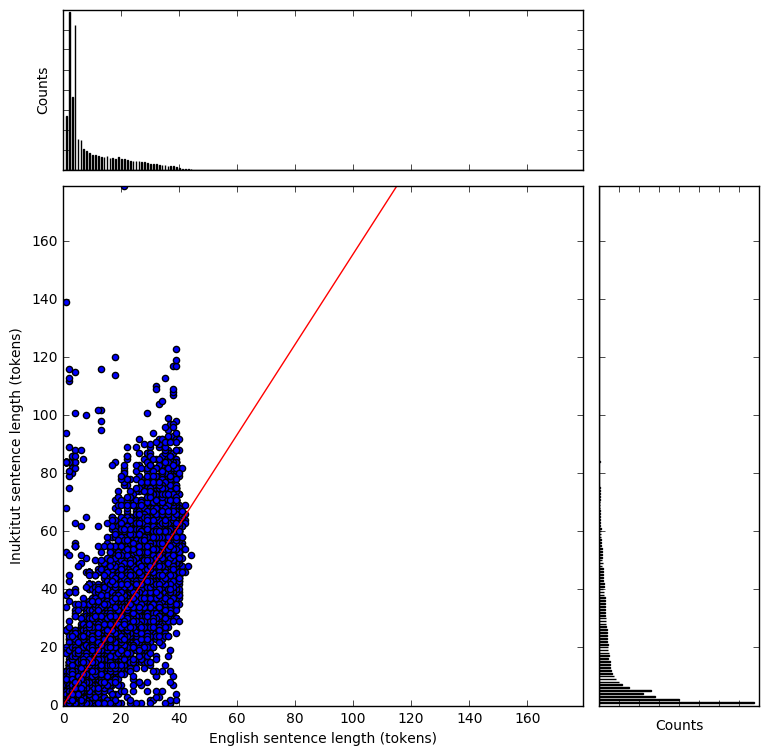

Sentence length correlation for in_en_data_mcb100_50000
Factor between English and Inuktitut sentence length is 3.19


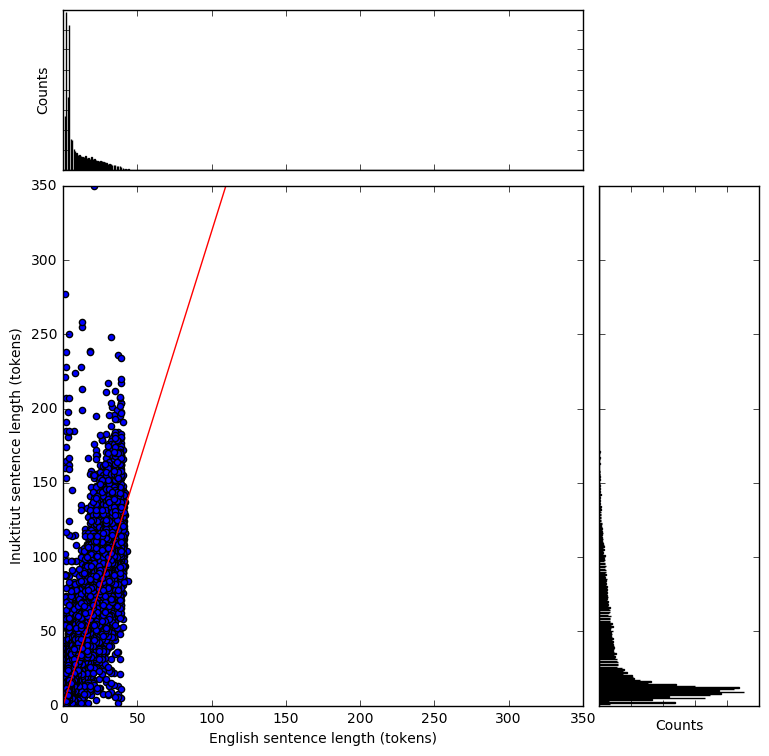

Sentence length correlation for in_en_data_mcb3000_50000
Factor between English and Inuktitut sentence length is 1.20


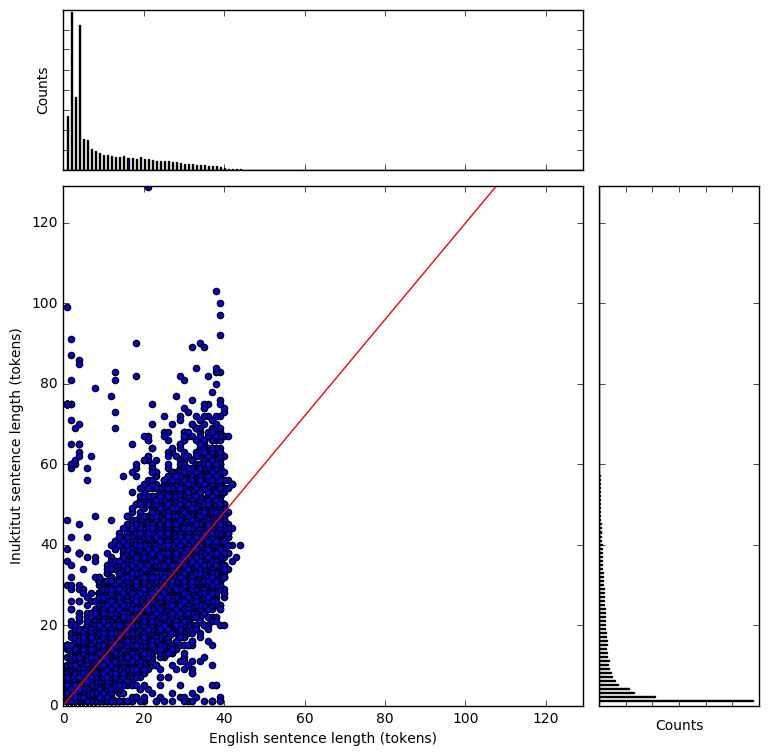

Sentence length correlation for in_en_data_mcb300_50000
Factor between English and Inuktitut sentence length is 2.27


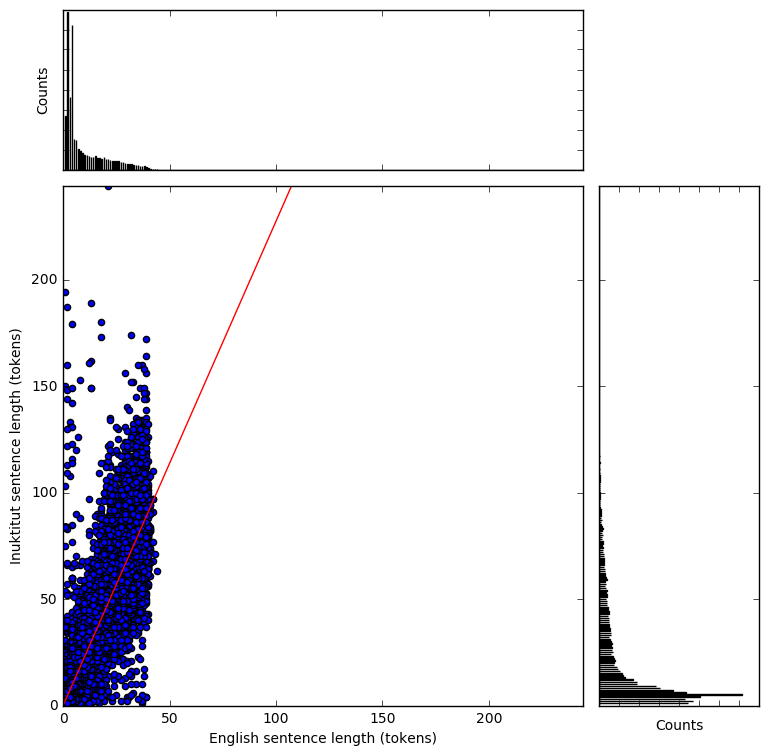

Sentence length correlation for in_en_data_mcb477_50000
Factor between English and Inuktitut sentence length is 1.62


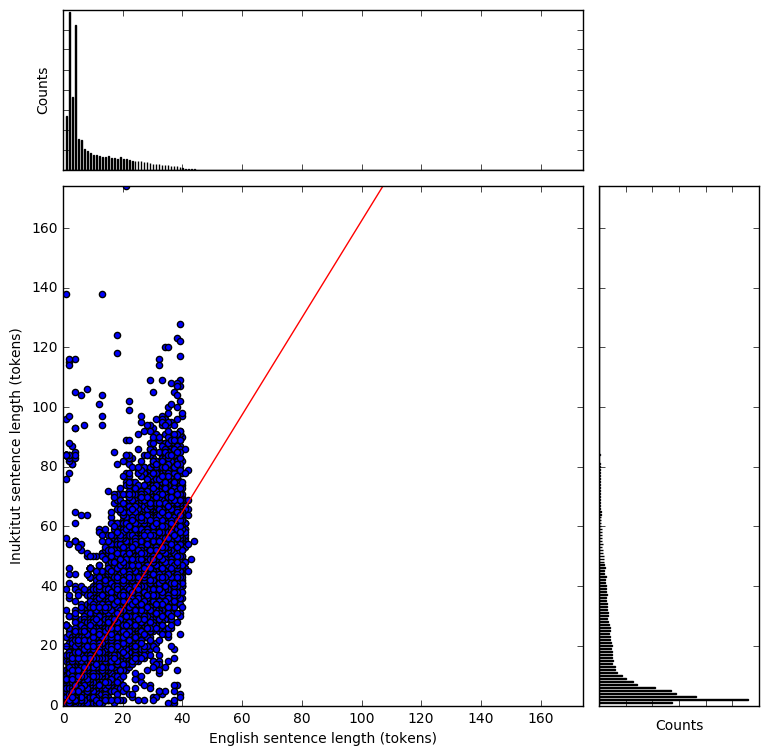

Sentence length correlation for in_en_data_mcb5000_50000
Factor between English and Inuktitut sentence length is 1.06


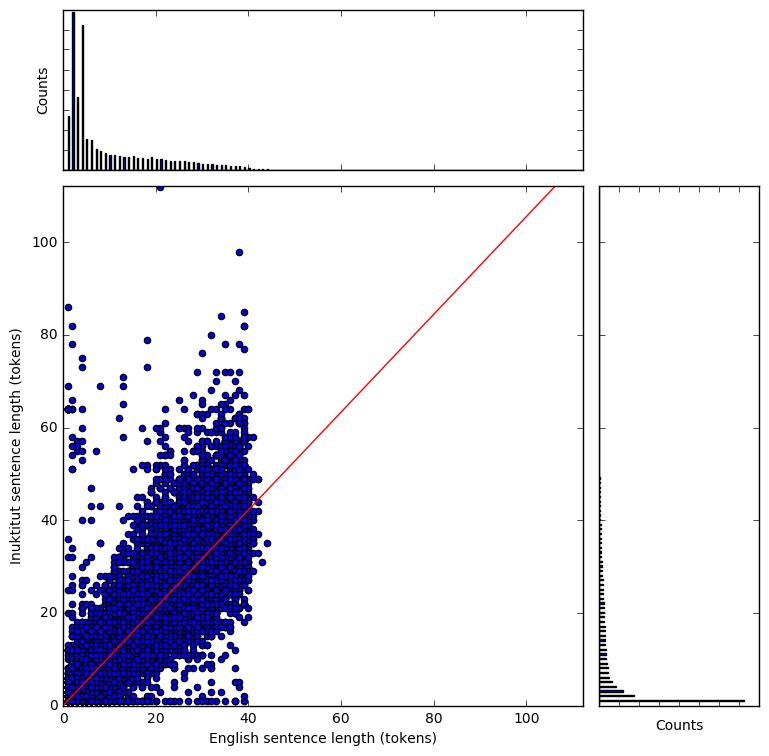

Sentence length correlation for in_en_data_mcb500_50000
Factor between English and Inuktitut sentence length is 1.90


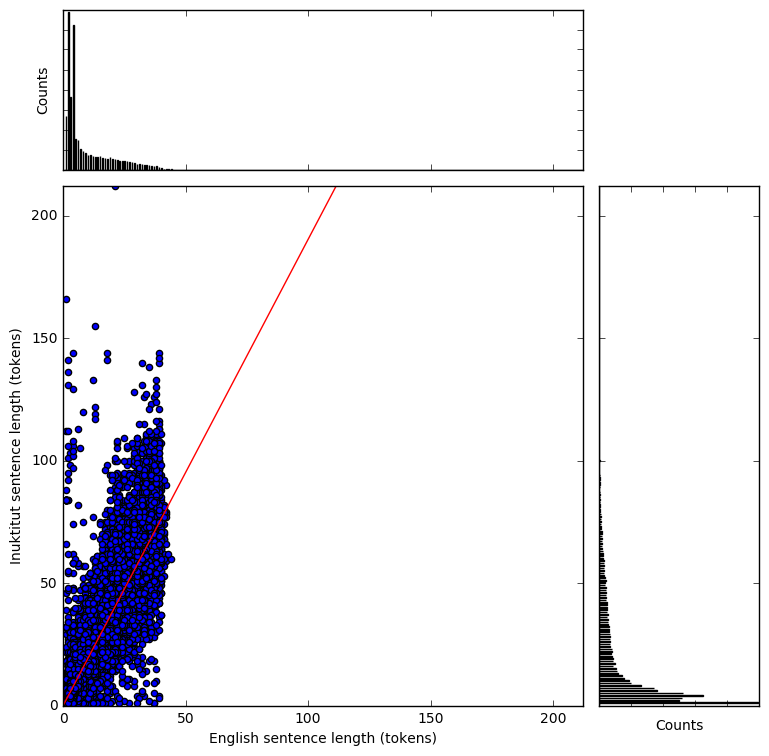

Sentence length correlation for in_en_data_mcb8_50000
Factor between English and Inuktitut sentence length is 0.87


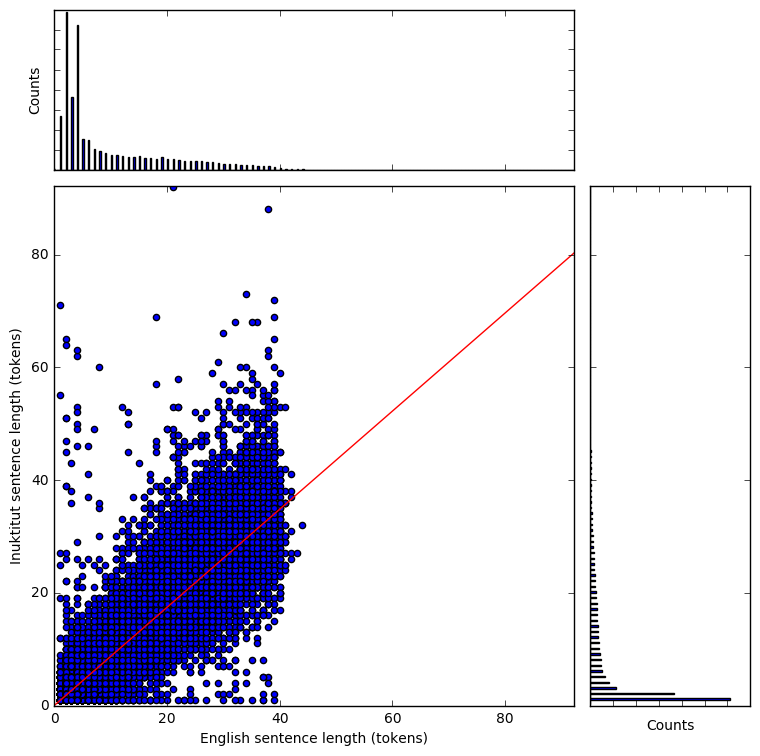

In [11]:
for data_dir in glob('in_en_data*_50000'):
    print("Sentence length correlation for {}".format(data_dir))
    plot_sent_corr(data_dir)